In [1]:
import pandas as pd
import yfinance as yf
import numpy as np

SPX_Constituents processing:

In [ ]:
spx_constituents = pd.read_csv("Data/SPX_const_data.csv",index_col=0)
spx_constituents.index.name = "Date"
spx_constituents.index = pd.to_datetime(spx_constituents.index)
spx_constituents_prices= spx_constituents[[col for col in spx_constituents.columns if "price" in col]]
spx_constituents_returns = spx_constituents_prices.pct_change()
spx_constituents_returns = spx_constituents_returns[1:]

SPX_Index Processing:

In [46]:
spx = yf.Ticker("^GSPC")
spx_prices = spx.history(start="2014-12-31", end="2025-01-29")["Close"]
spx_returns = spx_prices.pct_change()
spx_returns = spx_returns[1:]

Beta Calculation:

In [47]:
spx_constituents_returns.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2025-01-16', '2025-01-17', '2025-01-20', '2025-01-21',
               '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-27',
               '2025-01-28', '2025-01-29'],
              dtype='datetime64[ns]', name='Date', length=2629, freq=None)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
aligned_data

,SPX,A_price,ABBV_price,ABNB_price,ABT_price,ACGL_price,ACN_price,ADBE_price,ADI_price,ADM_price,...,WTW_price,WY_price,WYNN_price,XEL_price,XOM_price,XYL_price,YUM_price,ZBH_price,ZBRA_price,ZTS_price
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.000340,-0.009282,0.006877,NaN,-0.002665,-0.010320,-0.005263,-0.004952,0.000360,0.000385,...,NaN,0.006130,-0.012571,NaN,0.004110,0.000263,-0.006863,-0.007319,0.000258,0.006507
2015-01-05,-0.018278,-0.018738,-0.018819,NaN,0.000223,-0.005986,-0.016884,-0.004976,-0.018275,-0.034602,...,NaN,0.000000,-0.017020,NaN,-0.027362,-0.062237,-0.020320,0.037304,-0.014077,-0.006003
2015-01-06,-0.008893,-0.015578,-0.004950,NaN,-0.011356,0.002234,-0.007213,-0.020144,-0.023384,-0.019713,...,NaN,-0.001108,-0.021331,NaN,-0.005316,-0.005881,-0.012273,-0.008477,-0.007205,-0.009756
2015-01-07,0.011630,0.013272,0.040417,NaN,0.008108,0.005838,0.020990,0.008223,0.010516,0.015031,...,NaN,0.003050,0.029368,NaN,0.010133,0.007887,0.033138,0.024871,0.025465,0.020643
2015-01-08,0.017888,0.029975,0.010459,NaN,0.020554,0.017403,0.015249,0.025383,0.017655,-0.014609,...,NaN,0.010779,0.012031,NaN,0.016645,0.007546,0.017420,0.010617,0.021359,0.015399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,0.005313,-0.000983,0.008688,0.005585,0.046188,-0.002038,0.011556,-0.000091,0.019056,0.002771,...,-0.005208,0.006048,-0.000939,-0.013735,0.005661,-0.000493,0.006259,0.011757,0.001284,0.001980
2025-01-24,-0.002855,-0.006625,-0.002168,-0.046157,0.014689,-0.002795,-0.002340,-0.004345,-0.048084,-0.002961,...,0.010564,0.001670,-0.001058,0.008326,-0.013527,-0.000082,0.009842,-0.001802,-0.015435,0.009883
2025-01-27,-0.014581,-0.003170,0.038755,0.014714,0.035192,0.040535,0.029635,0.007396,-0.008971,0.032865,...,0.021931,0.028676,-0.002589,0.020718,0.013897,0.005018,0.020505,0.015973,-0.036782,0.026214


Skipping DPZ_price due to no overlapping data with index
Skipping MRP-W_price due to no overlapping data with index
Top 10 highest beta stocks:
          Beta
AMAT  1.641983
LRCX  1.677675
RCL   1.691207
MPWR  1.753480
ON    1.781859
CCL   1.868444
NCLH  1.895776
GEV   2.004919
CZR   2.092304
PLTR  2.405481

Top 10 lowest beta stocks:
          Beta
CPB   0.008546
KR    0.277803
CLX   0.288502
GIS   0.297420
K     0.302264
SJM   0.304834
HRL   0.332527
EVRG  0.360765
CAG   0.361358
CHD   0.393575

Beta statistics:
             Beta
count  494.000000
mean     0.990508
std      0.304813
min      0.008546
25%      0.794322
50%      0.988663
75%      1.173880
max      2.405481


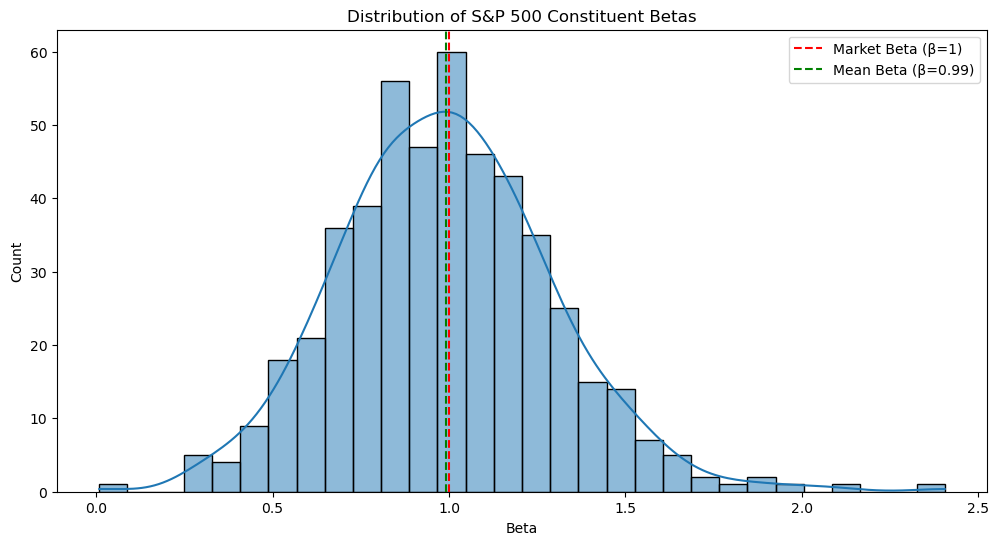

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handle timezone differences
if hasattr(spx_returns.index, 'tzinfo') and spx_returns.index.tzinfo is not None:
    spx_returns = spx_returns.tz_localize(None)
if hasattr(spx_constituents_returns.index, 'tzinfo') and spx_constituents_returns.index.tzinfo is not None:
    spx_constituents_returns = spx_constituents_returns.tz_localize(None)

# Align data by datetime index
aligned_data = pd.concat([spx_returns, spx_constituents_returns], axis=1)
aligned_data.columns = ['SPX'] + list(spx_constituents_returns.columns)
#Lets do first the beta for 5 years with no clustering:

aligned_data = aligned_data["2019":"2024"]

# Calculate beta for each stock
betas = {}
for column in spx_constituents_returns.columns:
    # Extract data and handle missing values properly
    stock_data = aligned_data[['SPX', column]].copy()
    stock_data.dropna(inplace=True)
    
    if len(stock_data) < 30:  # Ensure minimum sample size for reliable beta
        print(f"Warning: {column} has fewer than 30 data points after dropping NAs")
        if len(stock_data) == 0:
            print(f"Skipping {column} due to no overlapping data with index")
            continue
    
    # Calculate beta
    stock_returns = stock_data[column]
    market_returns = stock_data['SPX']
    
    # Calculate covariance between stock and market
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    
    # Calculate variance of market
    market_variance = np.var(market_returns)
    
    # Calculate beta
    beta = covariance / market_variance
    
    # Extract ticker symbol from column name
    ticker = column.split('_')[0]
    betas[ticker] = beta

# Convert to DataFrame for analysis
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Beta'])
beta_df = beta_df.sort_values('Beta')

# Display the top 10 highest and lowest beta stocks
print("Top 10 highest beta stocks:")
print(beta_df.tail(10))
print("\nTop 10 lowest beta stocks:")
print(beta_df.head(10))

# Calculate basic statistics
print("\nBeta statistics:")
print(beta_df.describe())

# Alternative method using linear regression
regression_betas = {}
for column in spx_constituents_returns.columns:
    # Extract data and handle missing values
    stock_data = aligned_data[['SPX', column]].copy()
    stock_data.dropna(inplace=True)
    
    if len(stock_data) < 30:
        if len(stock_data) == 0:
            continue
    
    # Prepare data for regression
    X = stock_data['SPX'].values.reshape(-1, 1)
    y = stock_data[column].values
    
    # Fit linear regression model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression().fit(X, y)
    
    # Extract beta (slope coefficient)
    ticker = column.split('_')[0]
    regression_betas[ticker] = model.coef_[0]

# Convert regression betas to DataFrame
regression_beta_df = pd.DataFrame.from_dict(regression_betas, orient='index', columns=['Beta'])
regression_beta_df = regression_beta_df.sort_values('Beta')

# Plot histogram of betas
plt.figure(figsize=(12, 6))
sns.histplot(beta_df['Beta'], bins=30, kde=True)
plt.title('Distribution of S&P 500 Constituent Betas')
plt.xlabel('Beta')
plt.axvline(x=1, color='red', linestyle='--', label='Market Beta (β=1)')
plt.axvline(x=beta_df['Beta'].mean(), color='green', linestyle='--', label=f'Mean Beta (β={beta_df["Beta"].mean():.2f})')
plt.legend()

# Compare two methods (optional)
beta_comparison = pd.DataFrame({
    'Cov/Var Beta': beta_df['Beta'],
    'Regression Beta': regression_beta_df['Beta']
})



In [63]:
top_50_betas_SP=beta_df.head(50)

In [67]:
for col in spx_constituents_returns.columns:
    print(col.split("_"))

['A', 'price']
['ABBV', 'price']
['ABNB', 'price']
['ABT', 'price']
['ACGL', 'price']
['ACN', 'price']
['ADBE', 'price']
['ADI', 'price']
['ADM', 'price']
['ADP', 'price']
['ADSK', 'price']
['AEE', 'price']
['AEP', 'price']
['AES', 'price']
['AFL', 'price']
['AIG', 'price']
['AIZ', 'price']
['AJG', 'price']
['AKAM', 'price']
['ALB', 'price']
['ALGN', 'price']
['ALL', 'price']
['ALLE', 'price']
['AMAT', 'price']
['AMCR', 'price']
['AMD', 'price']
['AME', 'price']
['AMGN', 'price']
['AMP', 'price']
['AMT', 'price']
['ANET', 'price']
['ANSS', 'price']
['AON', 'price']
['AOS', 'price']
['APA', 'price']
['APD', 'price']
['APH', 'price']
['APO', 'price']
['APTV', 'price']
['ARE', 'price']
['ATO', 'price']
['AVB', 'price']
['AVGO', 'price']
['AVY', 'price']
['AWK', 'price']
['AXON', 'price']
['AXP', 'price']
['AZO', 'price']
['BA', 'price']
['BAC', 'price']
['BALL', 'price']
['BAX', 'price']
['BBY', 'price']
['BDX', 'price']
['BEN', 'price']
['BF/B', 'price']
['BG', 'price']
['BIIB', 'price']

In [74]:
top_50_betas_returns = spx_constituents_returns[[col for col in spx_constituents_returns.columns if col.split("_")[0] in top_50_betas_SP.index]]
top_50_betas_returns = top_50_betas_returns["2024":"2025"]

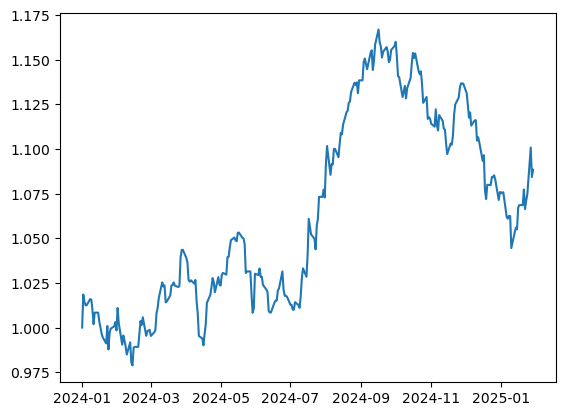

In [75]:
mean_returns_top_50 = top_50_betas_returns.mean(axis = 1)
cum_returns_top_50 = (1 + mean_returns_top_50).cumprod()
plt.plot(cum_returns_top_50, label="Top 50 Betas")